In [67]:
# 사용할 모듈 불러오기 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [68]:
# 패키지 임포트
import os 
import numpy as np 
import pandas as pd
from pandas import to_datetime
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

%matplotlib inline

# ARIMA 모델 패키지
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Auto Arima 모델 패키지
# pip install --user pmdarima
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [69]:
# 데이터 불러오기
items = pd.read_csv("./data/items.csv")
shops = pd.read_csv("./data/shops.csv")
train = pd.read_csv("./data/sales_train.csv")
test = pd.read_csv("./data/test.csv")
item_categories = pd.read_csv('./data/item_categories.csv')

In [70]:
# date 를 datetime 형으로 변환 
train["date"] = pd.to_datetime(train["date"], format="%d.%m.%Y") 
train["date"]

0         2013-01-02
1         2013-01-03
2         2013-01-05
3         2013-01-06
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-10-09
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-10-03
Name: date, Length: 2935849, dtype: datetime64[ns]

In [71]:
pivot_for_train = train.pivot_table(index = ['date_block_num'] , values=['item_cnt_day'],aggfunc='sum')
pivot_for_train

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0
5,125381.0
6,116966.0
7,125291.0
8,133332.0


In [72]:
pivot_for_train['date_se'] = ['2013-01-01', '2013-02-01', '2013-03-01','2013-04-01','2013-05-01','2013-06-01','2013-07-01','2013-08-01','2013-09-01','2013-10-01','2013-11-01','2013-12-01',
                            '2014-01-01', '2014-02-01', '2014-03-01','2014-04-01','2014-05-01','2014-06-01','2014-07-01','2014-08-01','2014-09-01','2014-10-01','2014-11-01','2014-12-01',
                            '2015-01-01', '2015-02-01', '2015-03-01','2015-04-01','2015-05-01','2015-06-01','2015-07-01','2015-08-01','2015-09-01','2015-10-01']

In [73]:
pivot_for_train['date_block_num'] = pivot_for_train['date_se']
pivot_for_train

,item_cnt_day,date_se,date_block_num
date_block_num,,,
0,131479.0,2013-01-01,2013-01-01
1,128090.0,2013-02-01,2013-02-01
2,147142.0,2013-03-01,2013-03-01
3,107190.0,2013-04-01,2013-04-01
4,106970.0,2013-05-01,2013-05-01
5,125381.0,2013-06-01,2013-06-01
6,116966.0,2013-07-01,2013-07-01
7,125291.0,2013-08-01,2013-08-01
8,133332.0,2013-09-01,2013-09-01


In [74]:
pivot_for_train['date_se'] = pd.to_datetime(pivot_for_train['date_se'], infer_datetime_format=True)

In [75]:
pivot_for_train = pivot_for_train.set_index('date_se')
pivot_for_train

,item_cnt_day,date_block_num
date_se,,
2013-01-01,131479.0,2013-01-01
2013-02-01,128090.0,2013-02-01
2013-03-01,147142.0,2013-03-01
2013-04-01,107190.0,2013-04-01
2013-05-01,106970.0,2013-05-01
2013-06-01,125381.0,2013-06-01
2013-07-01,116966.0,2013-07-01
2013-08-01,125291.0,2013-08-01
2013-09-01,133332.0,2013-09-01


In [76]:
pivot_for_train = pivot_for_train.drop(['date_block_num'],axis=1)
pivot_for_train

,item_cnt_day
date_se,
2013-01-01,131479.0
2013-02-01,128090.0
2013-03-01,147142.0
2013-04-01,107190.0
2013-05-01,106970.0
2013-06-01,125381.0
2013-07-01,116966.0
2013-08-01,125291.0
2013-09-01,133332.0


In [77]:
# 4주간의 값을 예측할 것이므로 예측날짜들을 인덱스로 한 dataframe 만들기
index_4_weeks = pd.date_range(pivot_for_train.index[-1], freq='M', periods = 4, tz = None) 

# 확인해보기
index_4_weeks

DatetimeIndex(['2015-10-31', '2015-11-30', '2015-12-31', '2016-01-31'], dtype='datetime64[ns]', freq='M')

In [78]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(pivot_for_train, order=(1,1,2))
result = model.fit()

# 예측한 값들을 저장
fcast1 = result.forecast(4)[0]
fcast1 = pd.Series(fcast1, index=index_4_weeks)
fcast1 = fcast1.rename("Arima")

# 확인
fcast1

2015-10-31    74486.660659
2015-11-30    74486.660659
2015-12-31    74486.660659
2016-01-31    74486.660659
Freq: M, Name: Arima, dtype: float64

In [79]:
# 단순회귀분석

# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# 데이터 셋
pivot_for_train = train.pivot_table(index = ['date_block_num'], values = ['item_cnt_day'], aggfunc='sum')
pivot_for_train

,item_cnt_day
date_block_num,
0,131479.0
1,128090.0
2,147142.0
3,107190.0
4,106970.0
5,125381.0
6,116966.0
7,125291.0
8,133332.0


In [81]:
df = pivot_for_train.reset_index()
df.head()

,date_block_num,item_cnt_day
0,0,131479.0
1,1,128090.0
2,2,147142.0
3,3,107190.0
4,4,106970.0


In [82]:
ndf = df[['date_block_num', 'item_cnt_day']]
print(ndf.head())

   date_block_num  item_cnt_day
0               0      131479.0
1               1      128090.0
2               2      147142.0
3               3      107190.0
4               4      106970.0


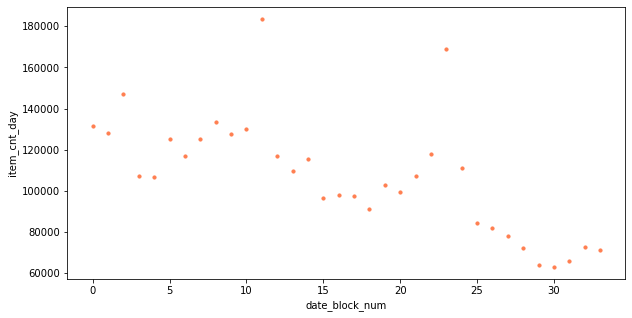

In [83]:
# 산점도
ndf.plot(kind='scatter', x='date_block_num', y='item_cnt_day', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()

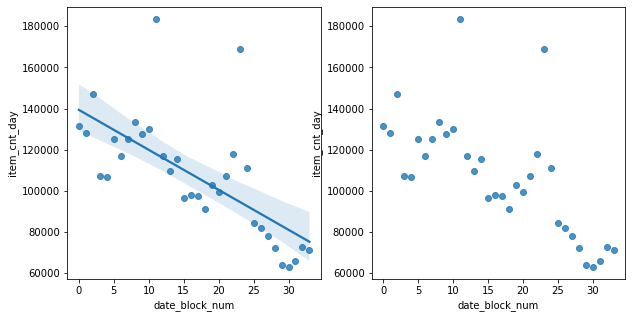

In [84]:
# seaborn 산점도
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='date_block_num', y='item_cnt_day', data=ndf, ax=ax1)
sns.regplot(x='date_block_num', y='item_cnt_day', data=ndf, ax=ax2, fit_reg=False)
plt.show()
plt.close()

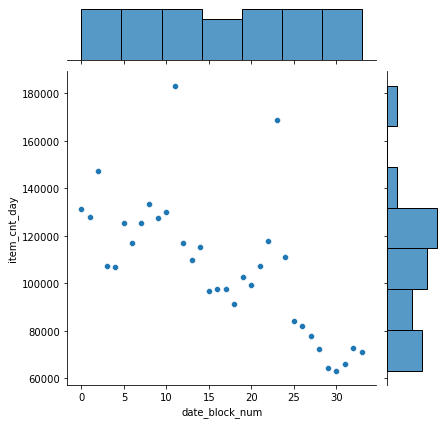

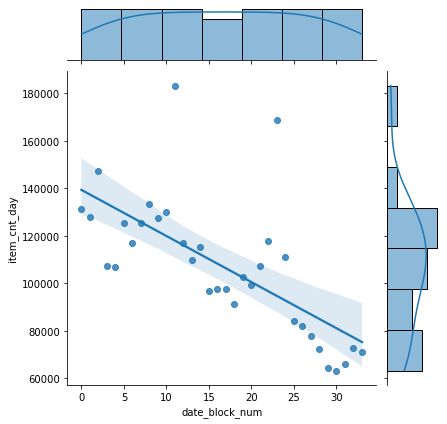

In [85]:
# 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='date_block_num', y='item_cnt_day', data=ndf)
sns.jointplot(x='date_block_num', y='item_cnt_day', kind='reg', data=ndf)
plt.show()
plt.close()

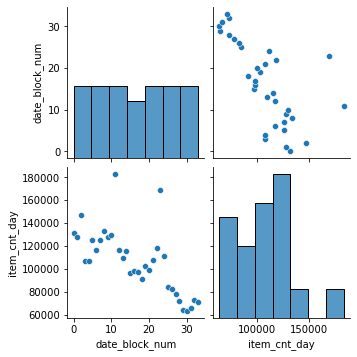

In [86]:
# 두 변수간의 모든 경우의 수
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

In [104]:
# 훈련/검증 데이터 분할
x_train = ndf[ndf['date_block_num'] < 33]['date_block_num']
y_train = ndf[ndf['date_block_num'] < 33]['item_cnt_day']

x_valid = ndf[ndf['date_block_num'] == 33]['date_block_num']
y_valid = ndf[ndf['date_block_num'] == 33]['item_cnt_day']

In [109]:
# 모형 학습 및 검증
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))
r_square = lr.score(np.array(x_valid).reshape(-1,1), np.array(y_valid).reshape(-1,1))

print(r_square)

nan
